In [15]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluation
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    roc_curve
)

In [4]:
diabetes_df = pd.read_csv('/Volumes/Editing/Bellevue Univ/Masters in Data Science/DSC 680 Applied Data Science/Project 2/diabetes.csv')

In [5]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Count of rows/columns
diabetes_df.shape

(768, 9)

In [8]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [16]:
diabetes_df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
diabetes_df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [11]:
# zeros represent missing values for certain medical fields
cols_with_zero_missing = [
    "Glucose", "BloodPressure", "SkinThickness",
    "Insulin", "BMI"
]

Zeros were treated as missing medical measurements and replaced with the median of each feature using explicit column reassignment to avoid chained assignment and ensure reproducibility.

In [12]:
# replace zeros with NaN missing values 
diabetes_df[cols_with_zero_missing] = diabetes_df[cols_with_zero_missing].replace(0, np.nan)

In [ ]:
# impute missing values with the median value
for col in cols_with_zero_missing:
    diabetes_df[col] = diabetes_df[col].fillna(diabetes_df[col].median())


In [18]:
# Feature/target split
X = diabetes_df.drop("Outcome", axis=1)
y = diabetes_df["Outcome"]

assert y.isna().sum() == 0
assert X.isna().sum().sum() == 0

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [ ]:
# Logistic regression pipeline
log_reg_pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("classifier", LogisticRegression(
        max_iter=1000,
        class_weight="balanced",
        random_state=42
    ))
])

log_reg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42))])

In [21]:
y_pred = log_reg_pipeline.predict(X_test)
y_prob = log_reg_pipeline.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

Accuracy: 0.7337662337662337
Precision: 0.6031746031746031
Recall: 0.7037037037037037
F1: 0.6495726495726496
ROC-AUC: 0.8125925925925926


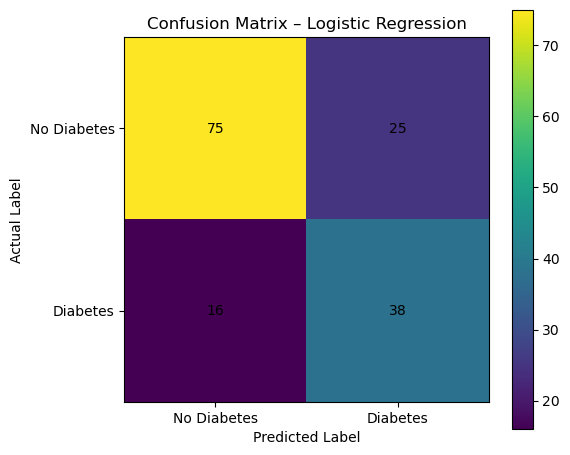

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
plt.imshow(cm)
plt.title("Confusion Matrix – Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.colorbar()

plt.xticks([0,1], ["No Diabetes", "Diabetes"])
plt.yticks([0,1], ["No Diabetes", "Diabetes"])

# lopp thru columns/rows of confusion matrix to plot result
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.tight_layout()
plt.show()

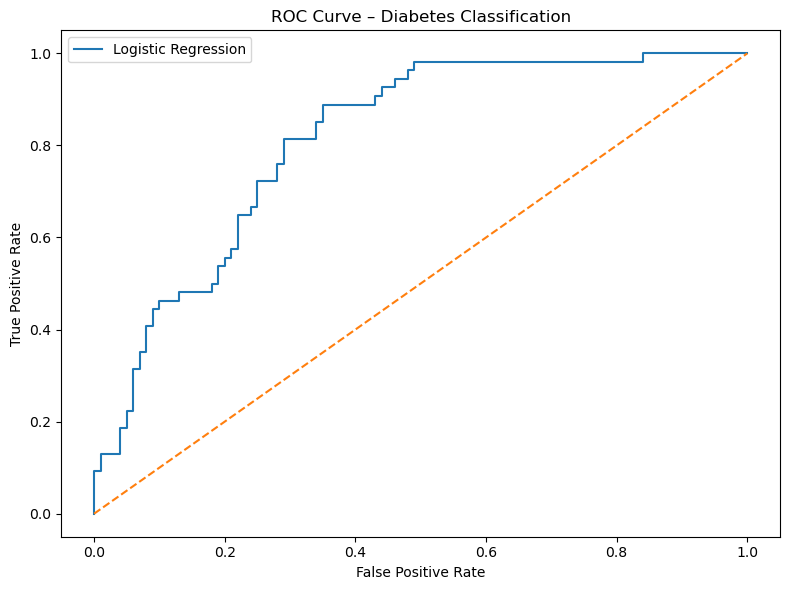

In [23]:
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label="Logistic Regression")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Diabetes Classification")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
dt_pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("classifier", DecisionTreeClassifier(
        random_state=42,
        class_weight="balanced"
    ))
])
# random forest for classification
rf_pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("classifier", RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        class_weight="balanced"
    ))
])

In [25]:
models = {
    "Logistic Regression": log_reg_pipeline,
    "Decision Tree": dt_pipeline,
    "Random Forest": rf_pipeline
}

results = []


In [26]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_prob)
    })

comparison_df = pd.DataFrame(results).round(3)
comparison_df

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression,0.734,0.603,0.704,0.650,0.813
1,Decision Tree,0.708,0.615,0.444,0.516,0.647
2,Random Forest,0.727,0.630,0.537,0.580,0.814


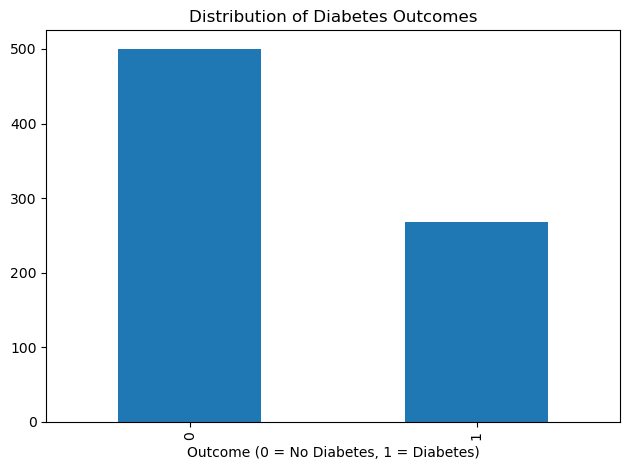

In [29]:
# detect class imbalance 
diabetes_df['Outcome'].value_counts().plot(kind='bar')
plt.title("Distribution of Diabetes Outcomes")
plt.xlabel("Outcome (0 = No Diabetes, 1 = Diabetes)")
plt.ylabel("")
plt.tight_layout()
plt.show()

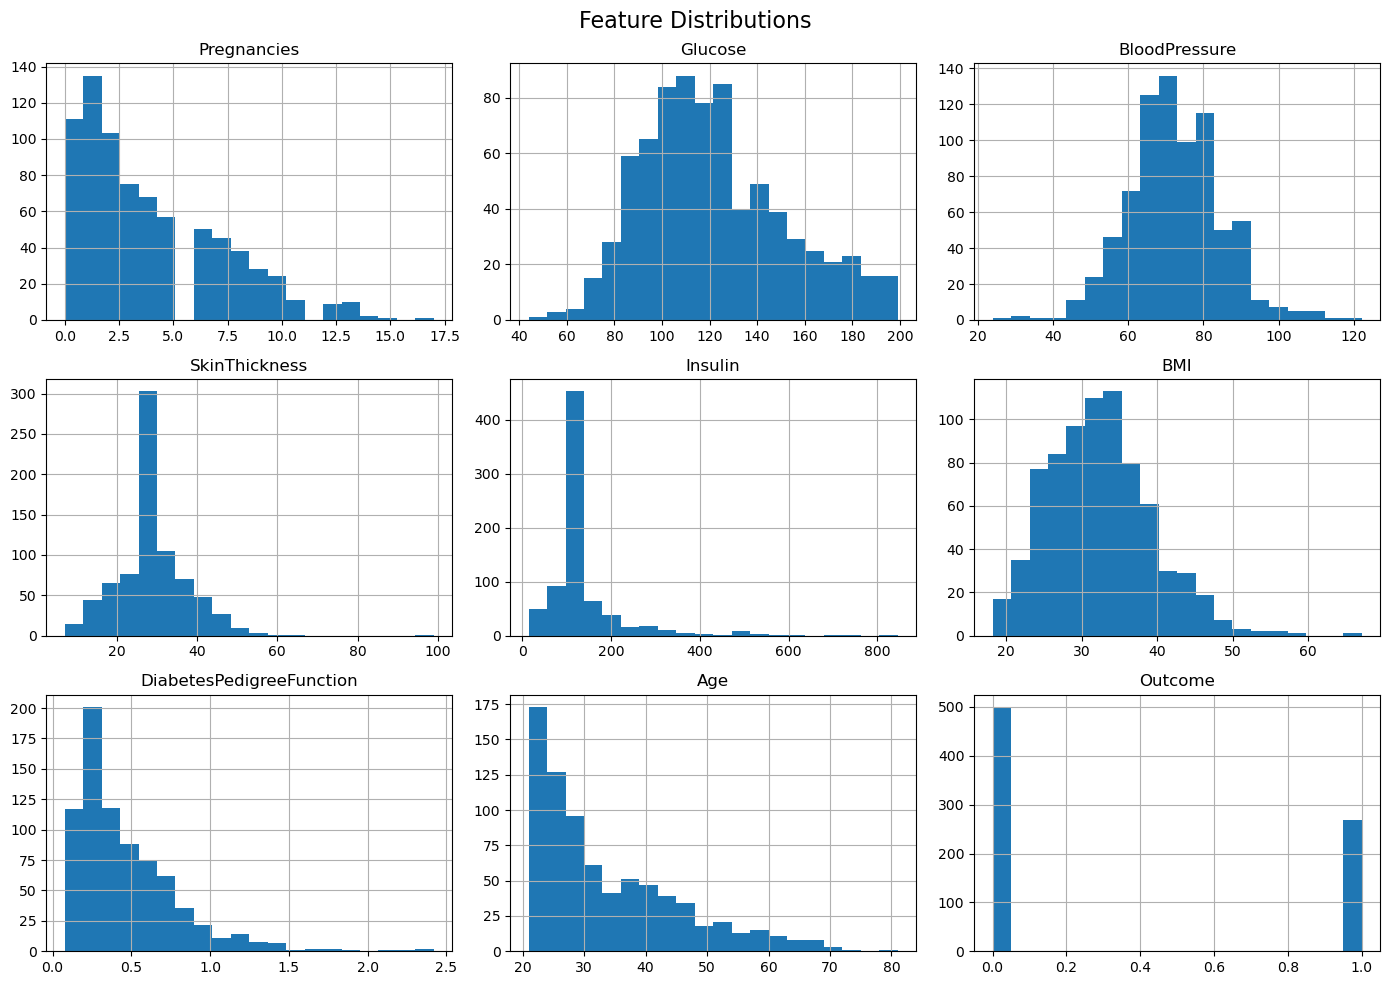

In [ ]:
diabetes_df.hist(figsize=(14,10), bins=20)
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()  
plt.show()

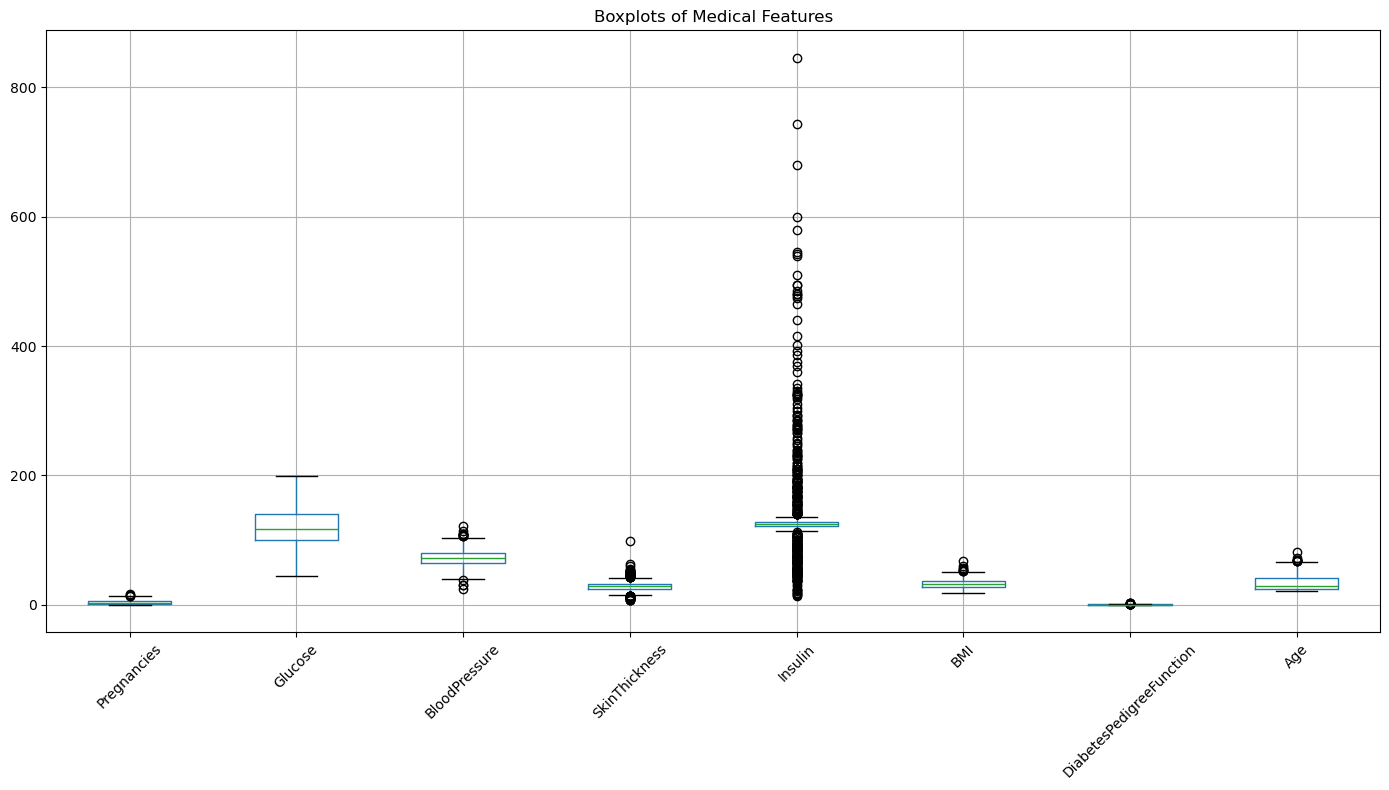

In [31]:
plt.figure(figsize=(14,8))
diabetes_df.drop(columns='Outcome').boxplot()
plt.xticks(rotation=45)
plt.title("Boxplots of Medical Features")
plt.tight_layout()
plt.show()

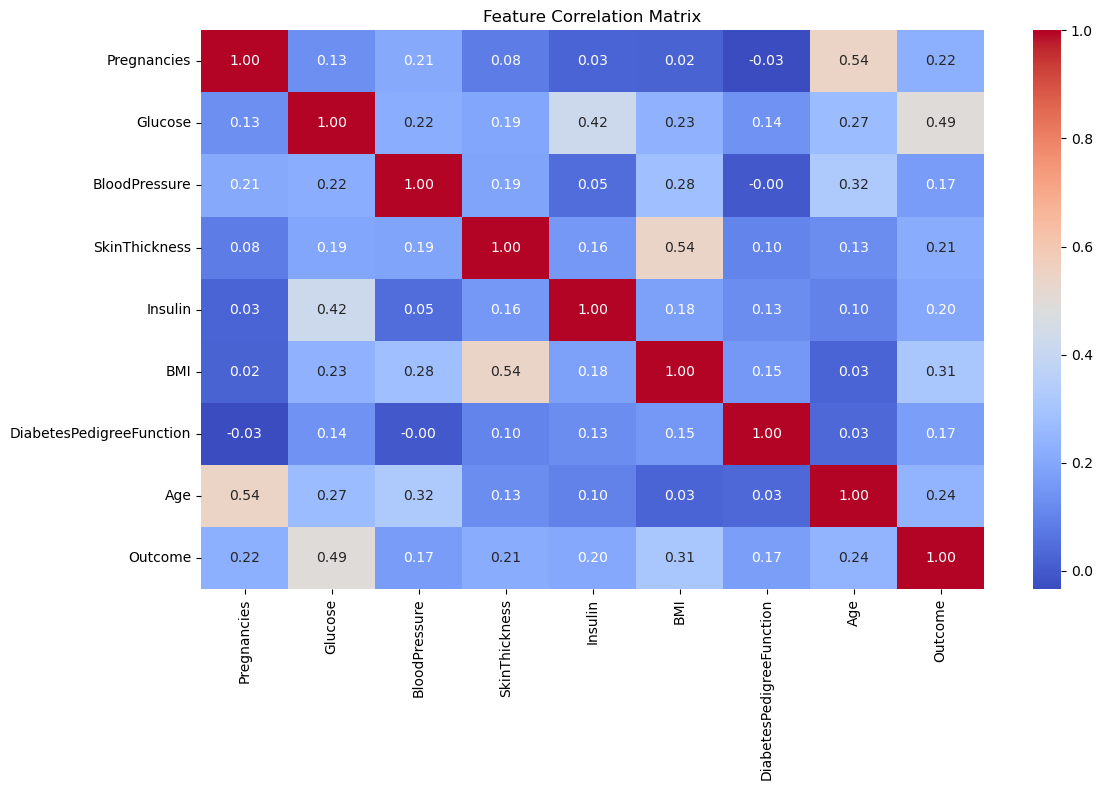

In [32]:
plt.figure(figsize=(12,8))
sns.heatmap(diabetes_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()

Notes
* Glucose is strongly correlated with diabetes outcome
* BMI and age show moderate association
* No extreme multicollinearity concerns

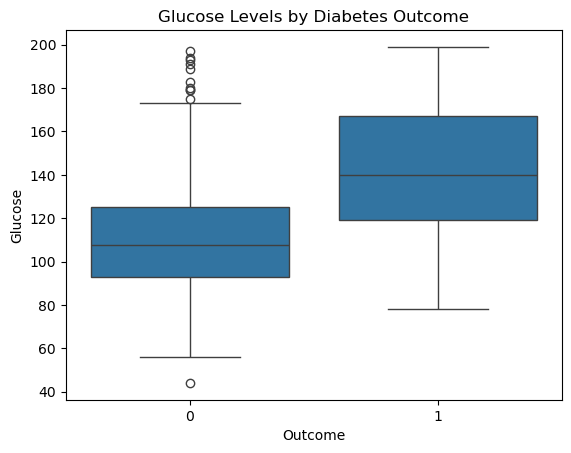

In [33]:
# glucose vs. outome 
sns.boxplot(x='Outcome', y='Glucose', data=diabetes_df)
plt.title("Glucose Levels by Diabetes Outcome")
plt.show()

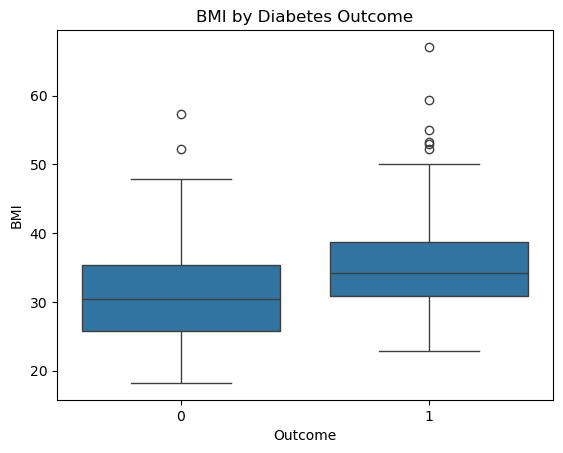

In [34]:
# BMI vs. outcome 
sns.boxplot(x='Outcome', y='BMI', data=diabetes_df)
plt.title("BMI by Diabetes Outcome")
plt.show()

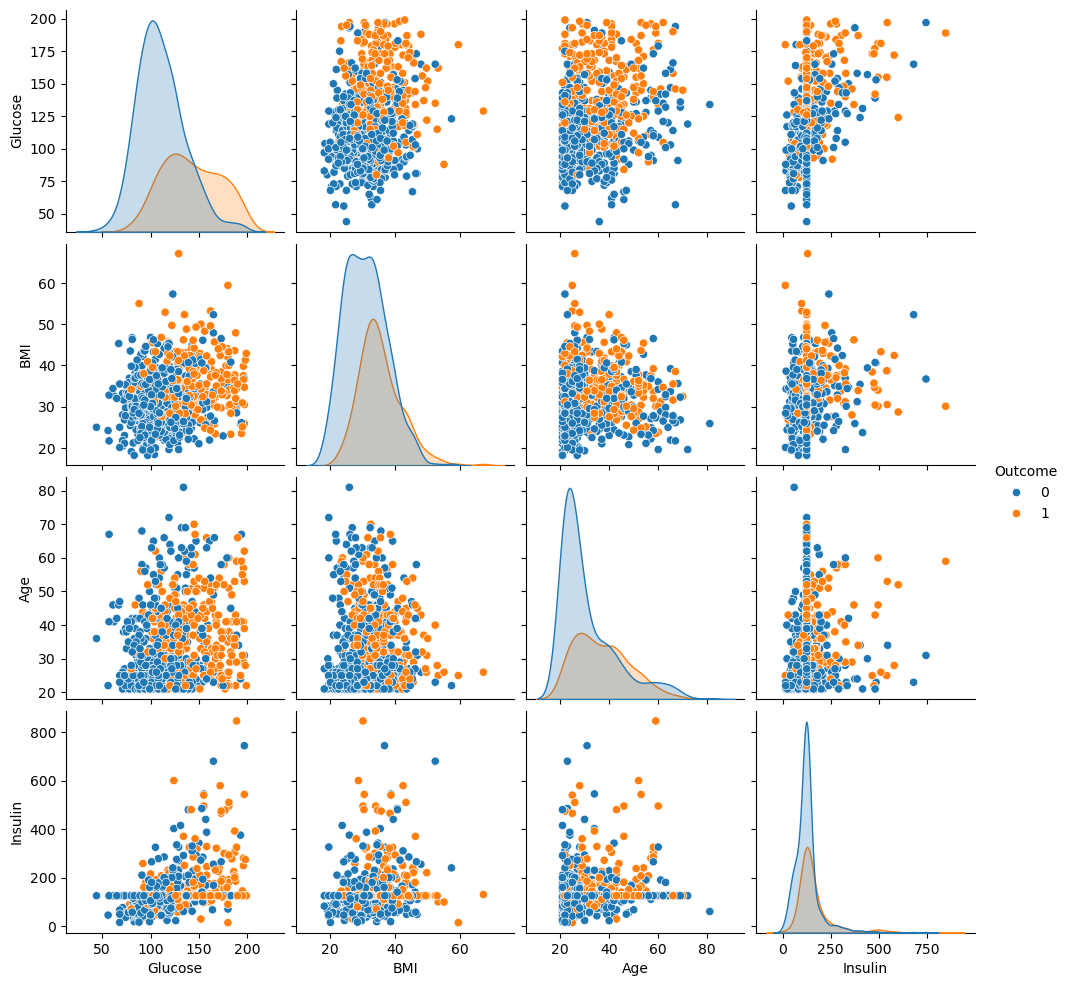

In [35]:
sns.pairplot(
    diabetes_df,
    vars=['Glucose', 'BMI', 'Age', 'Insulin'],
    hue='Outcome',
    diag_kind='kde'
)
plt.show()